# Rachel Langgin 
# PHYS 104–Andrea Lommen
# Project

In [160]:
# Import cell--Provided to me by Professor Kate Daniel
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Element 1/2: Read in the data set using a Class

In [161]:
class Data:
    """A class for reading in a the GAIA-GALAH ERD3 Data provided to me by Professor Kate Daniel"""
    def loaddata(indata):  
        indata = 'clean_data.npy' # Assign indata to a file name containing our data
        data = np.load(indata) # load the data using np.load
        return(data) # return the data

In [162]:
# Using our Data class
MWdata = Data # Instantiate MWdata as a object in the class "Data"

In [163]:
# Call the loaddata method on the object MWdata to load in our Milky Way Data
MWdata.loaddata

<function __main__.Data.loaddata(indata)>

In [164]:
# Define individual arrays for specific quantities
ids = data[0]    # Identification name or number
x = data[1]     # x-coordinate in the Milky Way (kpc)
y = data[2]     # y-coordinate in the Milky Way (kpc)
z = data[3]     # z-coordinate in the Milky Way (kpc)
vx = data[4]      # x-direction velocity in the Milky Way (km/s)
vy = data[5]      # y-direction velocity in the Milky Way (km/s)
vz = data[6]      # z-direction velocity in the Milky Way (km/s)
feh = data[7]     # iron abundance [Fe/H]
alpha = data[8]   # alpha element abundance [alpha/Fe]
flag = data[9]    # ids = pd.DataFrame((ids), columns = ['id'])    # Identification name or number

In [165]:
# Redefine specific quantities of the data as pandas dataframes
ids = pd.DataFrame((ids), columns = ['id']) 
x = pd.DataFrame((x), columns = ['x-coord'])     # x-coordinate in the Milky Way (kpc)
y = pd.DataFrame((y), columns = ['y-coord'])     # y-coordinate in the Milky Way (kpc)
z = pd.DataFrame((z), columns = ['z-coord'])     # z-coordinate in the Milky Way (kpc)
vx = pd.DataFrame((vx), columns = ['x-vel'])      # x-direction velocity in the Milky Way (km/s)
vy = pd.DataFrame((vy), columns = ['y-vel'])      # y-direction velocity in the Milky Way (km/s)
vz = pd.DataFrame((vz), columns = ['z-vel'])      # z-direction velocity in the Milky Way (km/s)
feh = pd.DataFrame((feh), columns = ['Fe/H'])     # iron abundance [Fe/H]
alpha = pd.DataFrame((alpha), columns = ['alpha/Fe'])   # alpha element abundance [alpha/Fe]
flag = pd.DataFrame((flag), columns = ['Flagged'])    # flagged issue codeidflagged issue code

### Element 2: Aggregate the data into a large and easy-to-read dataframe/table

In [166]:
# Create a list of the columns of data
data_list = [ids, x, y, z, vx, vy, vz, feh, alpha, flag]
# Create a table using pandas concat function to merge the columns together 
MWtable = pd.concat(data_list, axis=1, join='inner')

In [167]:
# Drop the NaN values from the table
MWtable = MWtable.dropna()

### Element 3: Using only a subset of the data using iloc

In [168]:
# Assign met_alpha as the Iron and Alpha Element Abundance by using iloc to index only the 7th and 8th column
met_alpha = MWtable.iloc[:,[7,8]] 

### Element 4: Numerical Analysis-Correlation Analysis

In [169]:
# Run a correlation test on the Iron Abundance and the Alpha Element Abundadance
tablecomps.corr()

,Fe/H,alpha/Fe
Fe/H,1.0000,-0.5426
alpha/Fe,-0.5426,1.0000


In [170]:
# Calculate the distance to each object using the XYZ coordinates 
# We add 8 bc earth is located along the -8 x axis
dist = (np.sqrt(((MWtable['x-coord']+8)**2) + (MWtable['y-coord']**2) + (MWtable['z-coord']**2)))
print(dist) # Print the distance of each object from the sun in kpc

2         0.583678
3         0.280012
4         1.293152
5         0.306054
6         0.670361
            ...   
275104    0.503461
275105    0.549917
275106    0.270296
275107    0.839316
275108    0.282490
Length: 236559, dtype: float64


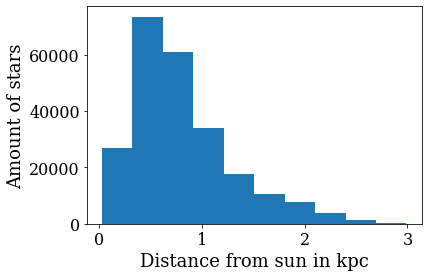

In [171]:
# Create different distance cuts 
dist_cut1 = 0.50
dist_cut2 = 0.25

near_50 = dist < dist_cut1
far_75 = dist > dist_cut2
near_25 = dist < dist_cut2

bins = np.linspace(start= 0.0, stop = 1.0)
xlabel = "Distance from sun in kpc"
ylabel = "Amount of stars"
plt.xlabel(xlabel,fontsize=18)
plt.ylabel(ylabel,fontsize=18)

# plt.rc('text', usetex=False) Make fancy plot labels 
plt.rc('font', **{'family':'serif','size':20})
plt.rc('axes', labelsize=16)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16) 
plt.hist(dist);

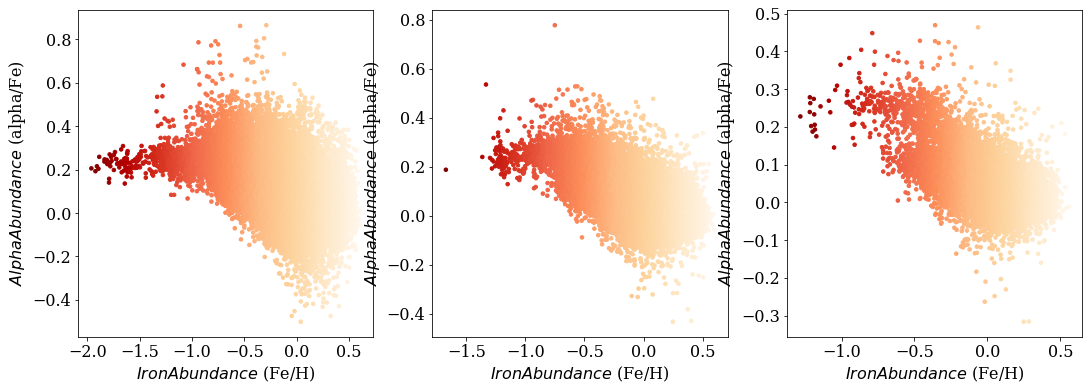

In [172]:
# Alpha Abundance of Stars in the Milky Way with the metallicity of stars at multiple distance cuts
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))

# Assign the alpha and metallicity column from MWtable respectively
alpha = MWtable['alpha/Fe'] 
met = MWtable['Fe/H']
alpha_50 = MWtable['alpha/Fe'][near_50] # Call alpha_50 the alpha column at 50% distance
met_50 = MWtable['Fe/H'][near_50] # Call met_50 the metallicity column at 50% distance
alpha_25 = MWtable['alpha/Fe'][near_25] # Call alpha_25 the alpha column at 25% distance
met_25 = MWtable['Fe/H'][near_25] # Call met_25 the metallicity column at 25% distance

# Create the scatter plots using an orange and red cmap
ax1.scatter(met, alpha, marker='.', s=50, c=met, cmap='OrRd_r');

ax2.scatter(met_50, alpha_50, marker='.', s=50, c=met_50, cmap='OrRd_r');

ax3.scatter(met_25, alpha_25, marker='.', s=50, c=met_25, cmap='OrRd_r');

#Create the x and y labels accordinly
xlabel = '$Iron Abundance$ (Fe/H)'
ylabel = '$Alpha Abundance$ (alpha/Fe)'
ax1.set_xlabel(xlabel,fontsize=16);
ax1.set_ylabel(ylabel,fontsize=16);
ax2.set_xlabel(xlabel,fontsize=16);
ax2.set_ylabel(ylabel,fontsize=16);
ax3.set_xlabel(xlabel,fontsize=16);
ax3.set_ylabel(ylabel,fontsize=16);

#savefig('Alpha Abundance vs. Metallicity.png',transparent=False, bbox_inches='tight', pad_inches=0.2, facecolor='white', edgecolor='white')

Text(0, 0.5, '$Alpha Abundance$ (alpha/Fe)')

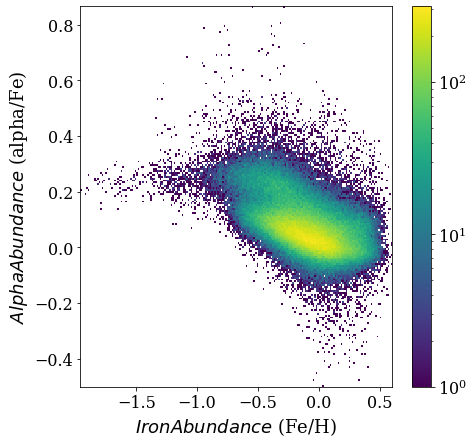

In [173]:
# Plot the metallicity vs. the alpha element abundance level using a 2d histogram
fig, ax = plt.subplots(figsize=(7,7))

alpha = MWtable['alpha/Fe']
met = MWtable['Fe/H']

hist = ax.hist2d(met, alpha,  bins=200, norm=LogNorm(), cmap='viridis');
fig.colorbar(hist[3], ax=ax)

xlabel = '$Iron Abundance$ (Fe/H)'
ylabel = '$Alpha Abundance$ (alpha/Fe)'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)
#savefig('Metallicity vs. Alpha Element.png',transparent=False, bbox_inches='tight', pad_inches=0.2, facecolor='white', edgecolor='white')

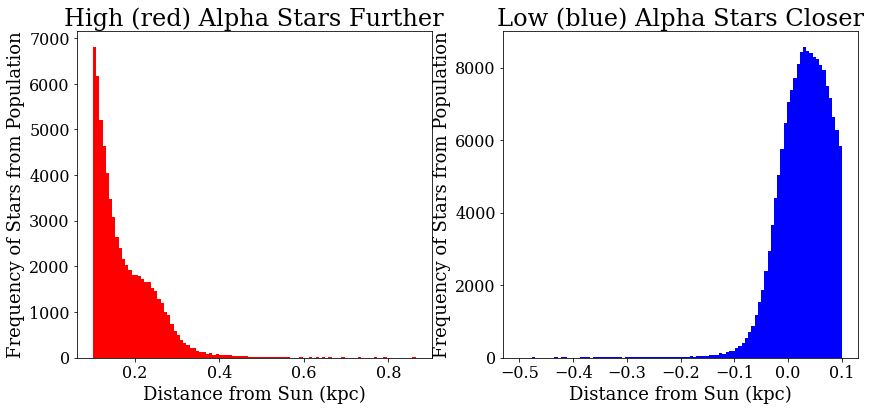

In [174]:
# Construct plot parameters
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

# Set up default x and y limits
xmin = min(dist)
xmax = max(dist)
ymin = min(MWtable['alpha/Fe'])
ymax = max(MWtable['alpha/Fe'])
xlims = [min(dist),max(dist)]
ylims = [min(MWtable['alpha/Fe']),max(MWtable['alpha/Fe'])]

# Use linspace to set up the bins of the histogram to follow the default x and y limits
nbins = 200 # This set bins to have ~100 pc to a side
xbins = linspace(start = xmin, stop = xmax, num = nbins)
ybins = linspace(start = ymin, stop = ymax, num = nbins)
xcenter = (xbins[0:-1]+xbins[1:])/2.0
ycenter = (ybins[0:-1]+ybins[1:])/2.0

alpha = MWtable['alpha/Fe'] # select alpha abundancy column from df table
alphaarray = np.array(alpha, dtype = np.float64)  # convert df to array float values

largealpha = alpha[alphaarray > 0.1] # select alpha values that are > 0.1
lowalpha = alpha[alphaarray < 0.1] # select alpha values that are < 0.1

highdf = pd.DataFrame(largealpha) # create df of high alpha values
lowdf = pd.DataFrame(lowalpha) # create df of low alpha values

highalphaplot = ax1.hist(highdf,  bins=100, color='red',label='High Alpha'); # plot histogram of high alpha in red
lowalphaplot = ax2.hist(lowdf, bins=100, color='blue', label='Low Alpha'); # plot histogram of low alpha values in blue

xlabel = 'Distance from Sun (kpc)'
ylabel = 'Frequency of Stars from Population'

ax1.set_xlabel(xlabel,fontsize=18)
ax1.set_ylabel(ylabel,fontsize=18)
ax1.set_title('High (red) Alpha Stars Further');
ax2.set_xlabel(xlabel,fontsize=18)
ax2.set_ylabel(ylabel,fontsize=18)
ax2.set_title('Low (blue) Alpha Stars Closer');
#savefig('histograms.png',transparent=False, bbox_inches='tight', pad_inches=0.2, facecolor='white', edgecolor='white')

* More low alpha stars at a closer distance
* Not as many high alpha stars also at a further distance

## Test Suites: 

### Test 1: Jack Knife Resampling (Leave out one or more data points)

In [233]:
# Create a class to perform a Jack Knife Resampling 

class JackKnife: # Create the class
    """A class for finding the length of Iron and Alpha table columns to replot a certain amount of elements/points
    from the MWtable"""
    def jacktest(points): # Define a function called jacktest that takes # of elements inputed by the user
        table = MWtable # recall the MWtable
        jack_alpha = MWtable['alpha/Fe'].loc[:points] # Locate the amount of points of the alpha elements
        # A colon used on the left side of the index will display
        # everything before the particular index as an output. 
        jack_met = MWtable['Fe/H'].loc[:points] # Locate the amount of points of the Iron abundance
        
        fig, ax = plt.subplots(figsize=(7,7)) # Create the figure

        hist = ax.hist2d(jack_met, jack_alpha,  bins=200, norm=LogNorm(), cmap='viridis'); # Create the 2d histogram
        # of the jack knife test of metallicity vs. alpha elements
        fig.colorbar(hist[3], ax=ax); # add the color bar to the right side of the hist
    
        xlabel = '$Iron Abundance$ (Fe/H)' # Add the xlabel as the iron abundance
        ylabel = '$Alpha Abundance$ (alpha/Fe)' # Add the ylable as the alpha elements

        ax.set_xlabel(xlabel,fontsize=18) # set the xlabel as the xlabel defined with fontsize
        ax.set_ylabel(ylabel,fontsize=18) # set the ylabel as the ylabel defined with fontsize
        percentage = (points/(len(table)))*100
        print('The percentage of total points included is: ',percentage,'%')
        return(print('The number of stars included in the Jack Knife Plot is: ', points)) # Print the # of points

In [234]:
jack = JackKnife 

The percentage of total points included is:  2.1136376126040437 %
The number of stars included in the Jack Knife Plot is:  5000


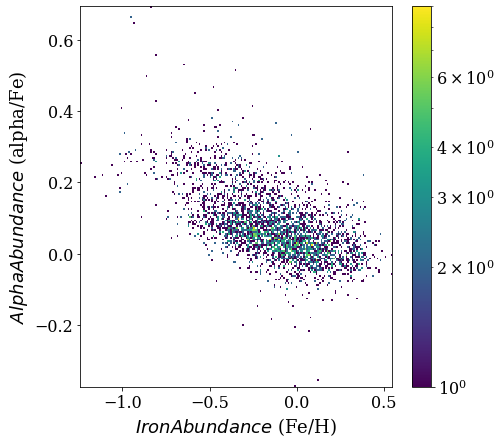

In [235]:
jack.jacktest(5000) # We can already see the pattern appear

The percentage of total points included is:  21.13637612604044 %
The number of stars included in the Jack Knife Plot is:  50000


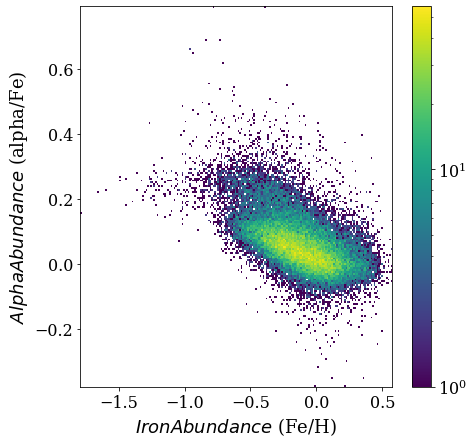

In [238]:
jack.jacktest(50000) # The disk separation becomes clearer

The percentage of total points included is:  46.922754999809776 %
The number of stars included in the Jack Knife Plot is:  111000


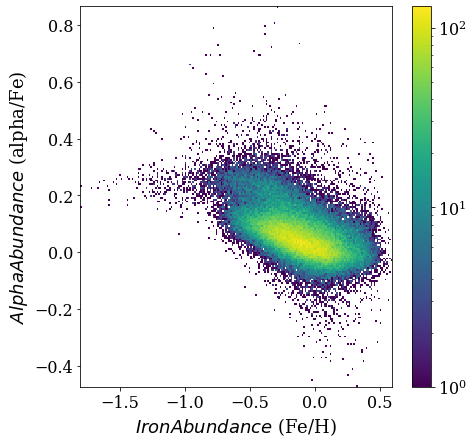

In [241]:
jack.jacktest(111000) # We can clearly see a higher portion of low iron low alpha and high alpha high iron 

As seen above by the Jack Knife test, even with less than a quarter and with less than a half of the data points, the pattern can be clearly depicted. 

### Test 2: Check 2D Histogram with other Velocity Data Columns

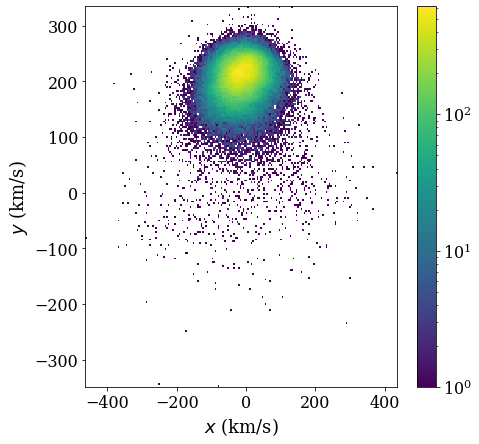

In [243]:
#X- and Y- directional Velocities of Stars in the Milky Way
fig, ax = plt.subplots(figsize=(7,7))

vx = MWtable['x-vel']
vy = MWtable['y-vel']

hist = ax.hist2d(vx, vy,  bins=200, norm=LogNorm(), cmap='viridis');
fig.colorbar(hist[3], ax=ax)

xlabel = '$x$ (km/s)'
ylabel = '$y$ (km/s)'

ax.set_xlabel(xlabel,fontsize=18);
ax.set_ylabel(ylabel,fontsize=18);

As seen above by the plotting test above, we can clearly see the x- and y- directional velocities of stars in the Milky Way as expected. 

### Test 3: Convert distance to redshift to see if the data remains the same

In [244]:
from astropy import units as u # import astropy units as u 
def distance_to_redshift(dist): # define a function called distance_to_redshift that takes dist as the argument
    c = 3.0e5 * u.km/u.s # assign c as the speed of light in km/s
    H = 72.0 * (u.km/u.s)/u.Mpc # assign Hubble's constant as 72 km/s/Mpc
    redshift = (H * dist)/c # assign redshift as the redshift formula using Hubble's constant and c
    return(redshift) # return the redshift 

In [247]:
redshift = distance_to_redshift(dist) # Use the distance_to_redshift on the distance defined in the notebook previously

In [249]:
np.mean(redshift) # Find the mean of the redshift 

0.00019439351022168584

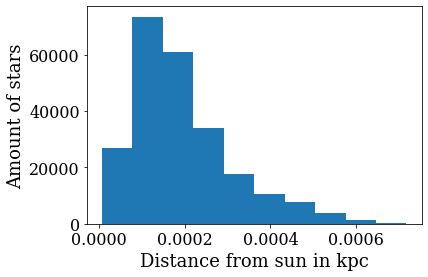

In [255]:
redshift_cut = redshift < 0.000194 # create a redshift cut of everything less than the mean of the redshift above

near = redshift < redshift_cut # create a redshift cut of everything included in the redshift cut

xlabel = "Redshift from the sun (z)" # Create the xlabel as z
ylabel = "Amount of stars" # Create the ylabel as the amount of stars
plt.xlabel(xlabel,fontsize=18) # Plot the xlabel
plt.ylabel(ylabel,fontsize=18) # Plot the ylabel
plt.hist(redshift); # Plot the histogram of the redshift with the amount of stars
#savefig('Distance Cut 25%.png',transparent=False, bbox_inches='tight', pad_inches=0.2, facecolor='white', edgecolor='white')

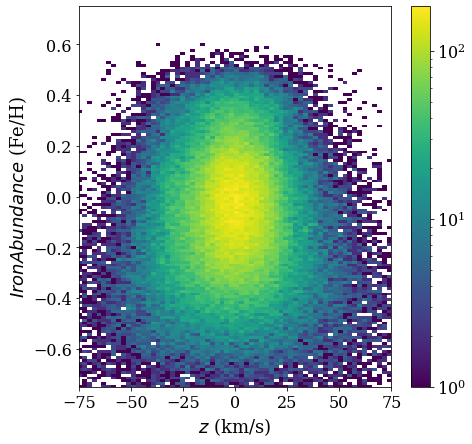

In [256]:
#z-directional Velocities of Stars in the Milky Way with the metallicity of stars
# This should be zoomed in based on the redshift cut above if it was done correctly 
fig, ax = plt.subplots(figsize=(7,7)) # Create the figure

z_near = MWtable['z-vel'][near] # assign the z-vel from the MWtable with the redshift near cut above
met_near = MWtable['Fe/H'][near] # assign the metallicity from the MWtable with the redshift near cut above

hist = ax.hist2d(z_near, met_near,  bins=200, norm=LogNorm(), cmap='viridis'); # Create the histogram of z vs. met
fig.colorbar(hist[3], ax=ax) # Add the color bar

xlabel = '$z$ (km/s)' # Create xlabel of the redshift
ylabel = '$Iron Abundance$ (Fe/H)' # Create the ylabel of the Iron Abundance 

ax.set_xlabel(xlabel,fontsize=18) # Plot the xlabel with fontsize 
ax.set_ylabel(ylabel,fontsize=18) # Plot the ylabel with fontsize
ax.set_xlim(-75, 75); # Set x limit zoomed in 
ax.set_ylim(-0.75, 0.75); # Set y limit
#savefig('Z-Vel vs. Metallicity NEAR.png',transparent=False, bbox_inches='tight', pad_inches=0.2, facecolor='white', edgecolor='white')

As we can see from the redshift conversion test above, our plots remain expected even while using redshift cuts. 